In [1]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))


from sd1d.analysis import *
from solkit.analysis_sk import *
from solkit.sk_plotting_functions import *

from hermes3.fluxes import *
from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

In [10]:
sk_stefan = SKDeck(os.path.join(onedrive_path, r"Project\SOLKiT\2022-06-12-1MW and 6MW runs"))
kinetic = {}
kinetic["6MW"] = pd.read_csv(os.path.join(onedrive_path, r"Project\digitisedplots\kinetic_6MW.csv"), header = None)
kinetic["1MW"] = pd.read_csv(os.path.join(onedrive_path, r"Project\digitisedplots\kinetic_1.0MW.csv"), header = None) 


In [ ]:
db = CaseDB()

toload = {
    # "base0" : "hsa2-tight_tol-1mw",
    "6mw_base" : "hsa2-tight_tol-6mw",
    "6mw_ei" : "hsa3-e_i_coll-6mw",
    "6mw_en" : "hsa4-e_n_coll-6mw",
    "6mw_snb" : "hsa2s-snb-6mw",
}

cs = dict()   # casestore

for name in toload:
    print(f"Loading {toload[name]}")
    cs[name] = Load.case_1D(os.path.join(onedrive_path, rf"Project\SD1D\studies\hermes_1eq\{toload[name]}"))


Loading hsa2-tight_tol-6mw
Loading hsa3-e_i_coll-6mw
Loading hsa4-e_n_coll-6mw
Loading hsa2s-snb-6mw


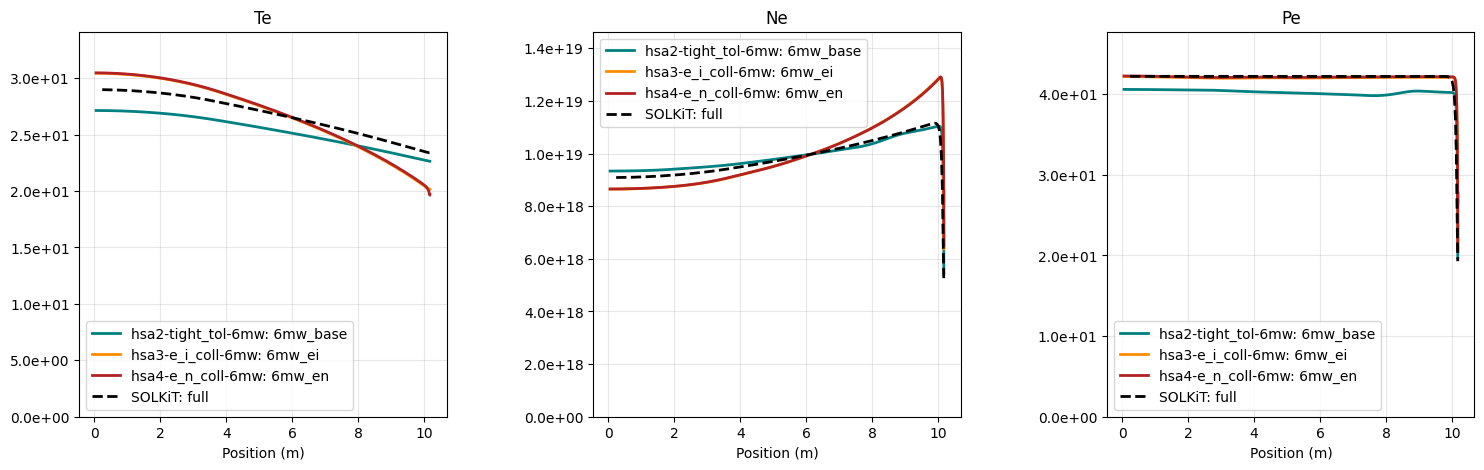

In [ ]:
lib = library()

# cases_sd1d = ["hsa2-tight_tol-6mw", "hsa2s-snb-6mw"]
# cases_sd1d = ["hsa3-e_i_coll-6mw", "hsa4-e_n_coll-6mw"]
# cases_sd1d = ["hsa3-e_i_coll-6mw", "hsa3s-e_i_coll-6mw"]

cases_sd1d = toload.values()
# dens = "5"
names = list(toload.keys())

labels = []
for i, case in enumerate(cases_sd1d):
    labels.append(f"{case}: {names[i]}")
    
colors = mike_cmap()
lw = 2
toplot = [ ["Te",  "Ne", "Pe"], 
        #   ["Ne", "Nd"]
          ]

for list_params in toplot:

    fig, axes = plt.subplots(1,3, figsize = (18,5))
    fig.subplots_adjust(wspace=0.4)

    for i, ax in enumerate(axes):
        param = list_params[i]
        for i, casename in enumerate(names):
                
            ds = cs[casename].ds.isel(pos=slice(2,-2), t = -1)
            ax.plot(ds["pos"], abs(ds[param]), color = colors[i], linewidth = lw, label = labels[i], marker = "o", ms = 0)

        try:

            # skdata = sk_stefan.cases[f'Output_job_TC_P1_1e19'].sk
            skdata = sk_stefan.cases[f'Output_job_TC_P6_1e19'].sk
            ax.plot(skdata["pos"], abs(skdata[param]), color = "black", alpha = 1, 
            linestyle = "dashed", linewidth = 2, label = "SOLKiT: full")
        except Exception:
            pass
            traceback.print_exc()
            
        # ax.plot(sk[cases_sk[1]]["pos"], sk[cases_sk[1]][param], color = colors[1], alpha = 0.4, linestyle = "solid", linewidth = lw, label = "SOLKiT 6MW")
        ax.set_xlabel("Position (m)")
        ax.set_title(param)
        ax.legend(fontsize = 10)
        ax.grid(which="major", alpha = 0.3)
        # if param in ["P", "M", "Ne", "Nn",  "Fcx", "Frec", "E", "F", "R", "Rex", "Rrec", "Riz", "Siz", "S", "Eiz", "Vi", "Srec"]:
        # if param not in ["Te", "Ti", "Tn"]:
        #     ax.set_xlim(9,10.2)
        if param in list_params:
            ax.set_ylim(0,ax.get_ylim()[1]*1.1)
            # ax.set_xlim(9,10.5)


            

            
        ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:.1e}"))
        

# July 2023 reruns

In [76]:
db = CaseDB()

toload = {
    # "base0" : "hsa2-tight_tol-1mw",
    "1mw_base" : "hsb1-Jul23rebase-1mw",
    "6mw_base" : "hsb1-Jul23rebase-6mw",
    "1mw_snb" : "hsb1s-Jul23rebase-1mw",
    "6mw_snb" : "hsb1s-Jul23rebase-6mw",
    "1mw_snb_nocond" : "hsb2s-hsb1s_disable_conduction-1mw",
    "6mw_snb_nocond" : "hsb2s-hsb1s_disable_conduction-6mw",
}

cs = dict()   # casestore

for name in toload:
    print(f"Loading {toload[name]}")
    cs[name] = Load.case_1D(os.path.join(onedrive_path, rf"Project\SD1D\studies\hermes_1eq\{toload[name]}"))


Loading hsb1-Jul23rebase-1mw
Loading hsb1-Jul23rebase-6mw
Loading hsb1s-Jul23rebase-1mw
Loading hsb1s-Jul23rebase-6mw
Loading hsb2s-hsb1s_disable_conduction-1mw
Loading hsb2s-hsb1s_disable_conduction-6mw


In [6]:
toload.keys()

dict_keys(['1mw_base', '6mw_base', '1mw_snb', '6mw_snb'])

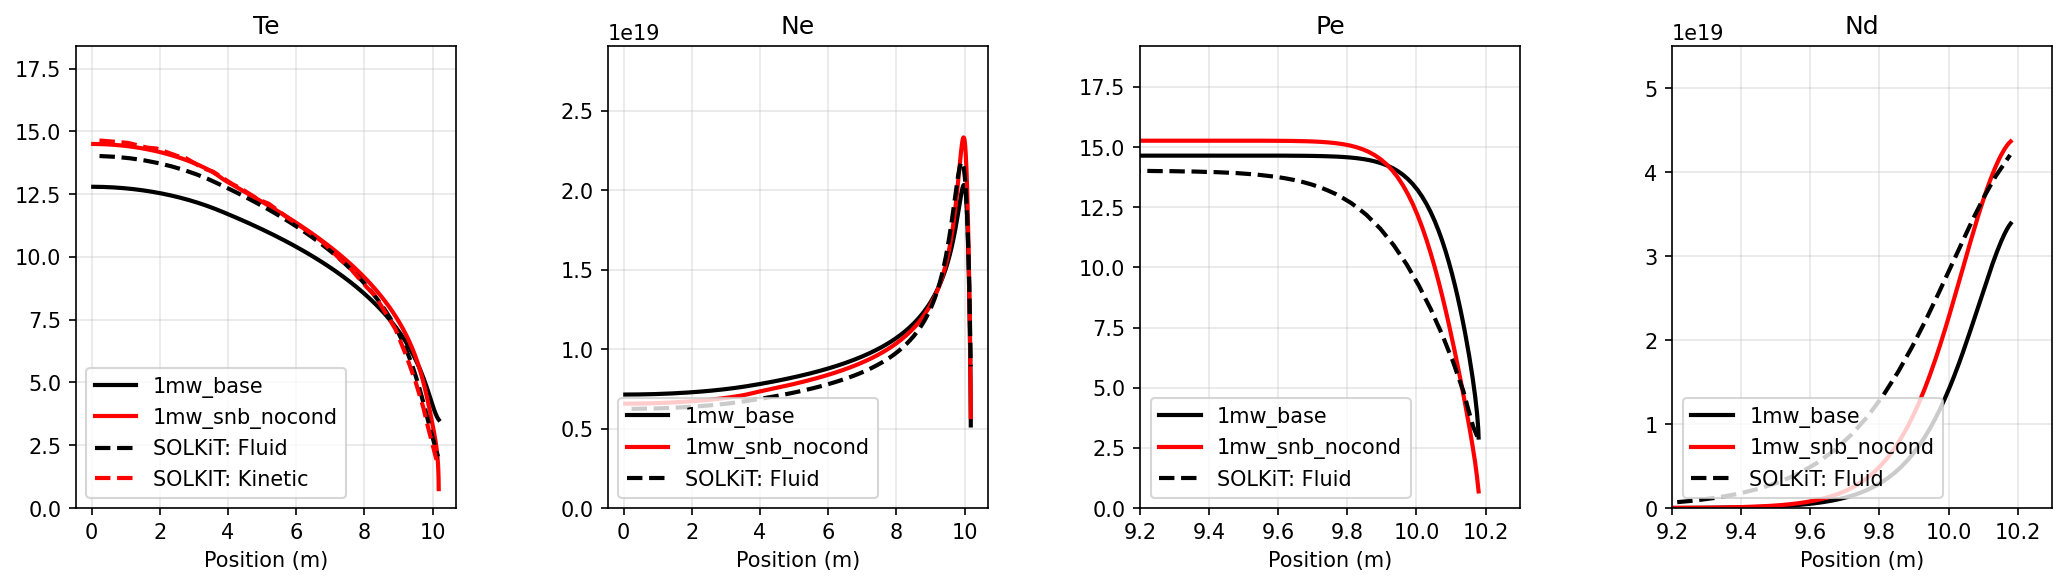

In [83]:
lib = library()

# cases_sd1d = ["hsa2-tight_tol-6mw", "hsa2s-snb-6mw"]
# cases_sd1d = ["hsa3-e_i_coll-6mw", "hsa4-e_n_coll-6mw"]
# cases_sd1d = ["hsa3-e_i_coll-6mw", "hsa3s-e_i_coll-6mw"]
power = "1"
# casenames = [f"{power}mw_base"]
# casenames = [f"{power}mw_base", f"{power}mw_snb"]
casenames = [f"{power}mw_base", f"{power}mw_snb_nocond"]
colors = ["black", "red"]
lw = 2
toplot = [ ["Te",  "Ne", "Pe", "Nd"]]
# toplot = [ ["Te"]]

for list_params in toplot:

    fig, axes = plt.subplots(1,len(toplot[0]), figsize = (17,4), dpi = 150)
    fig.subplots_adjust(wspace=0.4)

    for i, ax in enumerate(axes):
        param = list_params[i]
        for i, casename in enumerate(casenames):
                
            # Plot Hermes-3
            ds = cs[casename].ds.isel(pos=slice(2,-2), t = -1)
            ax.plot(ds["pos"], abs(ds[param]), color = colors[i], linewidth = lw, label = f"{casename}", marker = "o", ms = 0)

        try:
            # Plot SOLKIT
            skdata = sk_stefan.cases[f'Output_job_TC_P{power}_1e19'].sk
            if param == "Nd":
                skparam = "Nn"
            else:
                skparam = param
            ax.plot(skdata["pos"], abs(skdata[skparam]), color = colors[0], alpha = 1, linestyle = "dashed", linewidth = 2, label = "SOLKiT: Fluid")
        except Exception:
            pass
            traceback.print_exc()
            
        if any([x in param for x in ["Pe", "Nd"]]):
            ax.set_xlim(9.2,10.3)
        if param == "Te":
            kplot = kinetic[f"{power}MW"]
            ax.plot(kplot[0], kplot[1], color = colors[1], alpha = 1, linestyle = "dashed", linewidth = 2, label = "SOLKIT: Kinetic")   
            
        ax.set_xlabel("Position (m)")
        ax.set_title(param)
        ax.legend(fontsize = 10, loc = "lower left")
        ax.grid(which="major", alpha = 0.3)
        ax.set_ylim(0,ax.get_ylim()[1]*1.2)
            
        # ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:.1e}"))
        

In [46]:
cs["6mw_snb"].ds.data_vars

Data variables:
    Bxy                 (pos) float64 dask.array<chunksize=(52,), meta=np.ndarray>
    Dd_Dpar             (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
    Div_Q_SH            (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
    Div_Q_SNB           (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
    Ed+_iz              (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
    Ed+_rec             (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
    Ed_Dpar             (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
    Edd+_cx             (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
    Fd+_iz              (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
    Fd+_rec             (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
    Fd_Dpar             (t, pos) float64 dask.array<chunksize=(201, 52), meta=np.ndarray>
 